In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD
from keras import optimizers
from keras.utils.np_utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
my_data = pd.read_csv(r"/content/drive/MyDrive/deep demo/A_Z Handwritten Data.csv").astype('float32')
my_data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
my_frame = pd.DataFrame(my_data)
my_frame.head(500)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
my_frame.shape

(372450, 785)

In [ ]:
my_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: float32(785)
memory usage: 1.1 GB


In [ ]:
my_frame.describe()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
count,372450.000000,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,...,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000
mean,13.523490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001616,0.001592,0.001117,0.000929,0.000685,0.000596,0.000618,0.000690,0.000239,0.000011
std,6.740824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.490788,0.517297,0.421332,0.419180,0.385566,0.319820,0.208942,0.335227,0.134852,0.006554
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.000000,226.000000,229.000000,228.000000,235.000000,194.000000,103.000000,198.000000,82.000000,4.000000


In [ ]:
my_frame.isnull().sum()

0        0
0.1      0
0.2      0
0.3      0
0.4      0
        ..
0.644    0
0.645    0
0.646    0
0.647    0
0.648    0
Length: 785, dtype: int64

In [ ]:
x = my_frame.drop('0', axis = 1)
y = my_frame['0']

In [ ]:


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
x_train = np.reshape(x_train.values, (x_train.shape[0], 28, 28))
x_test = np.reshape(x_test.values, (x_test.shape[0], 28, 28))

print('Train Data Shape:', x_train.shape)
print('Test Data Shape:', x_test.shape)

Train Data Shape: (297960, 28, 28)
Test Data Shape: (74490, 28, 28)


In [ ]:


word_dict = {
    0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'
}

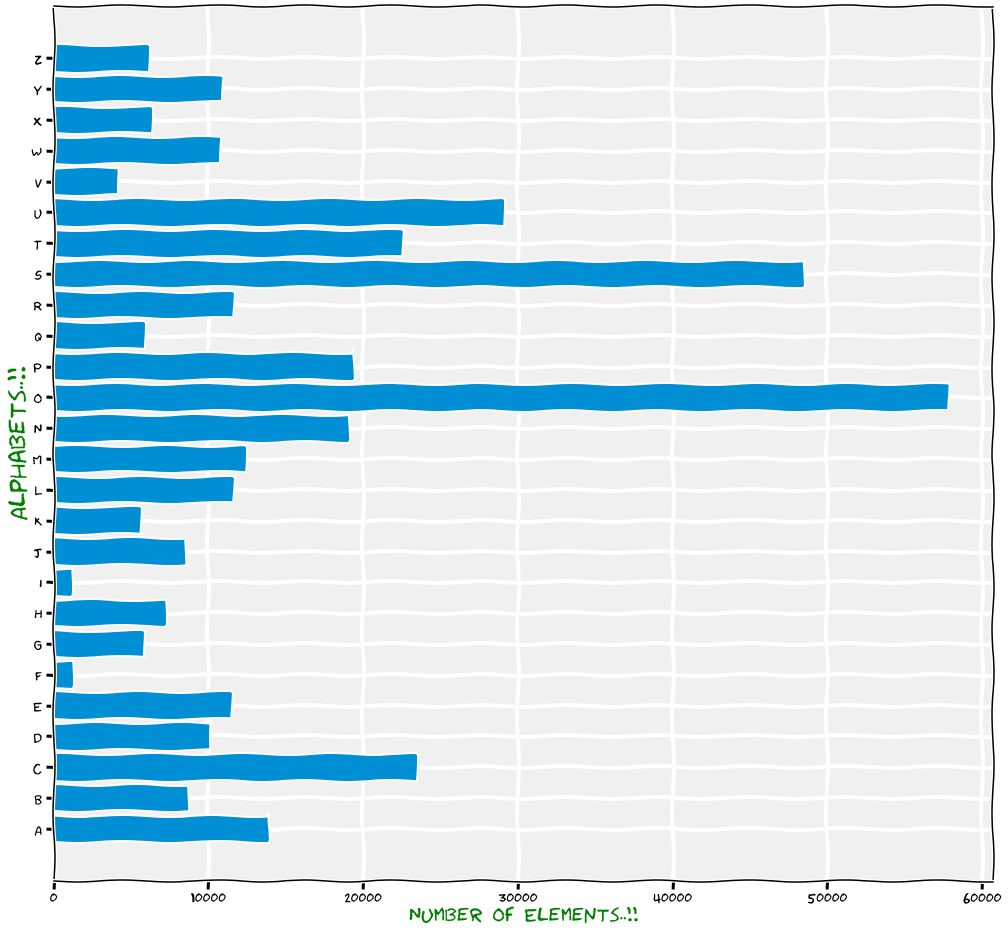

In [ ]:


plt.style.use('fivethirtyeight')
plt.xkcd()

y_integer = np.int0(y)
count = np.zeros(26, dtype = 'int')

for i in y_integer:
    count[i] += 1
    
alphabets = []

for i in word_dict.values():
    alphabets.append(i)
    
fig,ax = plt.subplots(1, 1, figsize = (15, 15))
ax.barh(alphabets, count)

plt.xlabel('Number Of Elements..!!', fontsize = 20, fontweight = 'bold', color = 'green')
plt.ylabel('Alphabets..!!', fontsize = 25, fontweight = 'bold', color = 'green')
plt.grid()
plt.show()

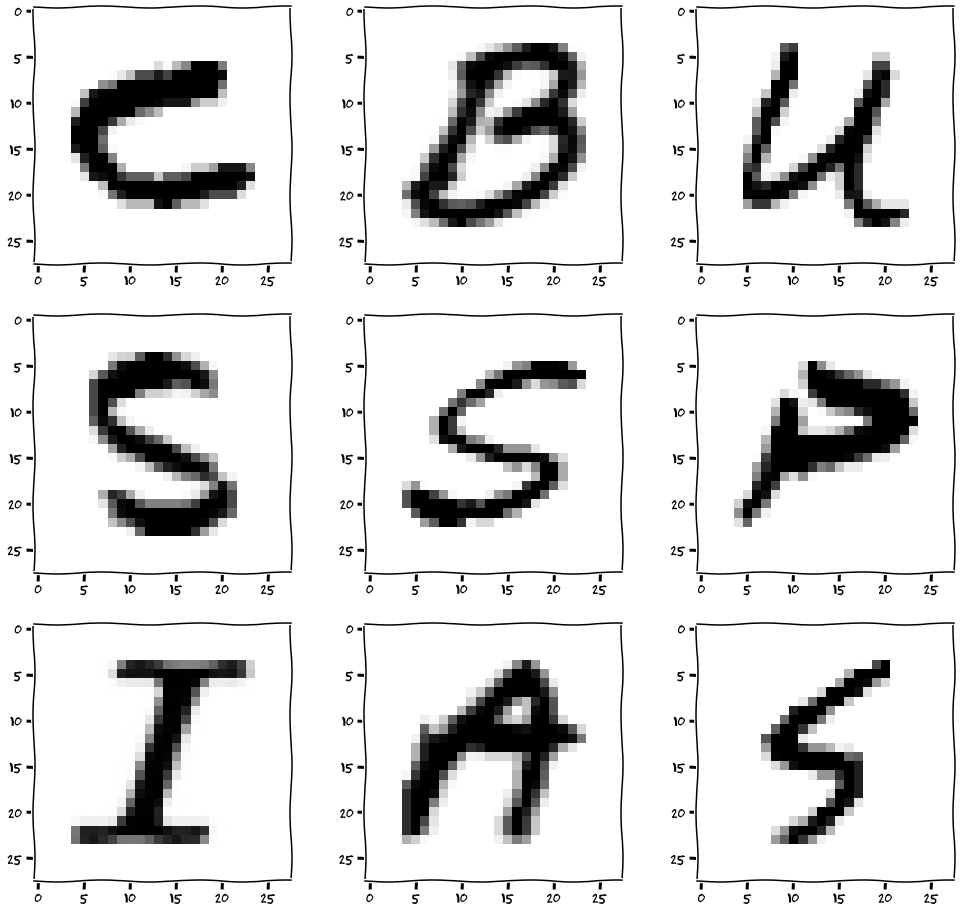

In [ ]:


plt.style.use('fivethirtyeight')
plt.xkcd()

shuff = shuffle(x_train[:100])
fig, ax = plt.subplots(3, 3, figsize = (15, 15))
axes = ax.flatten()

for i in range(9):
    shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28, 28)), cmap = 'Greys')
plt.show()

In [ ]:
# Reshaping the training & test dataset so that it can be put in the model
# Now we reshape the train & test image dataset so that they can be put in the model.


x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
print("New shape of train data:", x_train.shape)

x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
print("New shape of test data:", x_test.shape)

New shape of train data: (297960, 28, 28, 1)
New shape of test data: (74490, 28, 28, 1)


In [ ]:
# Here we convert the single float values to categorical values. 


categorical_train = to_categorical(y_train, num_classes = 26, dtype = 'int')
print("New shape of train labels:", categorical_train.shape)

categorical_test = to_categorical(y_test, num_classes = 26, dtype = 'int')
print("New shape of test labels:", categorical_test.shape)

New shape of train labels: (297960, 26)
New shape of test labels: (74490, 26)


In [ ]:

my_model = Sequential()

my_model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
my_model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

my_model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
my_model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

my_model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', padding = 'valid'))
my_model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

my_model.add(Flatten())

my_model.add(Dense(64, activation = "relu"))
my_model.add(Dense(128, activation = "relu"))

my_model.add(Dense(26, activation = "softmax"))

In [ ]:

my_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = my_model.fit(x_train, categorical_train, epochs = 5, validation_data = (x_test, categorical_test))

Epoch 1/5
9312/9312 [==============================] - 52s 5ms/step - loss: 0.1572 - accuracy: 0.9578 - val_loss: 0.0713 - val_accuracy: 0.9801
Epoch 2/5
9312/9312 [==============================] - 41s 4ms/step - loss: 0.0714 - accuracy: 0.9804 - val_loss: 0.0589 - val_accuracy: 0.9844
Epoch 3/5
9312/9312 [==============================] - 46s 5ms/step - loss: 0.0603 - accuracy: 0.9834 - val_loss: 0.0605 - val_accuracy: 0.9835
Epoch 4/5
9312/9312 [==============================] - 42s 5ms/step - loss: 0.0566 - accuracy: 0.9850 - val_loss: 0.0574 - val_accuracy: 0.9841
Epoch 5/5
9312/9312 [==============================] - 41s 4ms/step - loss: 0.0539 - accuracy: 0.9861 - val_loss: 0.0684 - val_accuracy: 0.9824


In [ ]:
my_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [ ]:
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.9801315665245056, 0.9843871593475342, 0.9834608435630798, 0.9841052293777466, 0.9824137687683105]
The training accuracy is : [0.9577829241752625, 0.9803698658943176, 0.9834172129631042, 0.9849745035171509, 0.9860585331916809]
The validation loss is : [0.07131557166576385, 0.058891661465168, 0.060546424239873886, 0.05738762393593788, 0.06844370067119598]
The training loss is : [0.1572086364030838, 0.07140327244997025, 0.060281746089458466, 0.05655745044350624, 0.05387376621365547]


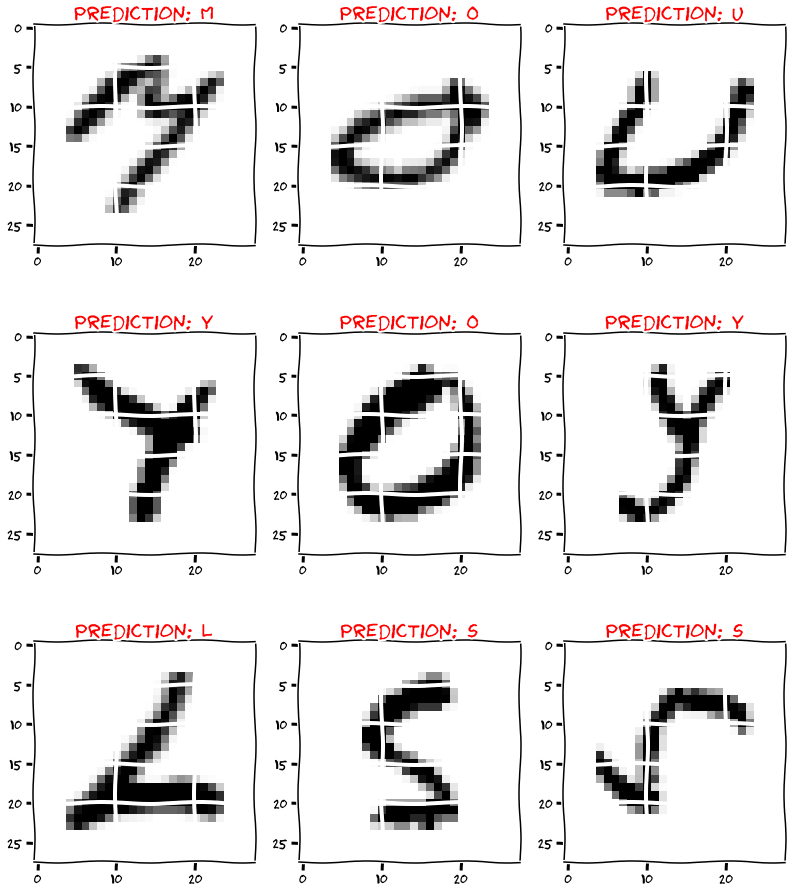

In [ ]:

plt.style.use('fivethirtyeight')
plt.xkcd()

fig, axes = plt.subplots(3, 3, figsize = (12, 15))
axes = axes.flatten()

for i, ax in enumerate(axes):
    img = np.reshape(x_test[i], (28, 28))
    ax.imshow(img, cmap = 'Greys')
    
    pred = word_dict[np.argmax(categorical_test[i])]
    ax.set_title("Prediction: " + pred, fontsize = 20, fontweight = 'bold', color = 'red')
    ax.grid()

In [ ]:
import cv2
img = cv2.imread(r"/content/drive/MyDrive/deep demo/alphabet b.png")
img_copy = img.copy()

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))


img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)#blur
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)#convert color
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)#threshold value set ,255-white

img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,1))



img_pred = word_dict[np.argmax(my_model.predict(img_final))]
#argmax-moethn 2 classes use argmax
cv2.putText(img, "Image Data", (100,25), cv2.FONT_HERSHEY_DUPLEX , fontScale= 1, thickness=2, color = (255,0,0))
cv2.putText(img, "Character Prediction: " + img_pred, (10,410), cv2.FONT_HERSHEY_SIMPLEX, fontScale= 1, thickness=2, color = (0,0,255))

cv2.imshow( 'Character Recognition',img)

while (1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()

1/1 [==============================] - 0s 154ms/step


DisabledFunctionError: ignored

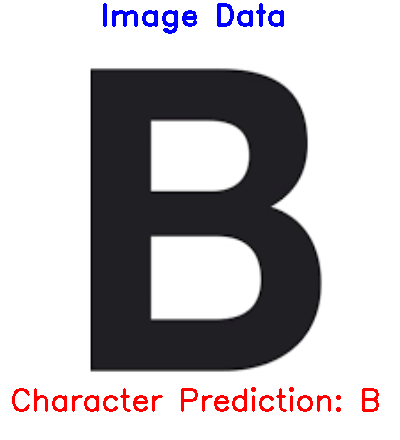

In [ ]:

from google.colab.patches import cv2_imshow
cv2_imshow(img)